# Parameter estimation for ranges of parameters

In [1]:
from read_ggp_run import *

In [2]:
params_config = {'mean_lambda': 'bound',
                    'gamma_lambda': 'bound',
                    'var_lambda': 'bound',
                    'mean_q': 'bound',
                    'gamma_q': 'bound',
                    'var_q':'bound',
                    'beta':'bound',
                    'var_x':'bound',
                    'var_g':'bound',
                    'var_dx':'bound',
                    'var_dg':'bound'} 


In [3]:
def plot_true_vs_estim(directory, sample, parameter, run_range, params_config, parameter2=None, log=True, err_bar_index=2):
    fig, ax = plt.subplots(figsize=(6,4))

    inits = []
    if parameter2 == None:
        parameter2 = parameter

    for i in run_range:
        directory_i = directory.format(i)
        sample_i = sample.format(i)
        filebase = default_filebase(directory_i, sample_i) # default

        _, minimization_final_file = get_minimization_file(filebase, params_config)
        parameters_settings = read_params_config(minimization_final_file)
        init = get_params_config(parameters_settings, parameter2)["init"].values[0]
        final = get_params_config(parameters_settings, parameter)["final"].values[0]
        err_bar = pd.read_csv(minimization_final_file, skiprows=14)[parameter].iloc[err_bar_index]

        ax.errorbar(init, final, yerr=err_bar, color='tab:blue',  fmt='o', ms=3, label="deviation prediction")

        # ax.scatter(init, final, color='tab:blue')
        inits.append(init)
    
    ax.set_ylabel("estim. "+parameter)
    ax.set_xlabel("true "+parameter2)
    if log == 'x':
        plt.xscale('log')
    if log == True:
        plt.xscale('log')
        plt.yscale('log')

    if parameter2 == parameter:
        ax.plot(inits, inits, ls='--',  color='tab:blue')

    # ax.set_xticks(param_range)
    # ax.set_xticklabels([ str(v) for i,v in enumerate(param_range)])

    # plt.legend(loc=(1.05,0))
    plt.show()


def plot_all_params(directory, sample, parameter, param_range, params_config, skip=0, logx=False):
    fig, ax = plt.subplots(figsize=(10,6))
    cmap = plt.cm.tab10

    if len(np.unique(param_range))==1:
        replicates = True
    else:
        replicates = False
    for i, param in enumerate(param_range):
        i+=skip

        directory_i = directory.format(i)
        sample_i = sample.format(i)

        filebase = default_filebase(directory_i, sample_i) # default
        minimization_iter_file, minimization_final_file = get_minimization_file(filebase, params_config)
        for j,k in enumerate(params_config.keys()):
            if k != parameter:
                parameters_settings = read_params_config(minimization_final_file)
                final = get_params_config(parameters_settings, k)["final"].values[0]
                init = get_params_config(parameters_settings, k)["init"].values[0]
        
                if replicates:
                    if i==skip:
                        plt.scatter(i, init/final, color=cmap(j), label=k)
                    else: 
                        plt.scatter(i, init/final, color=cmap(j))
                else:
                    if i==skip:
                        plt.scatter(param, init/final, color=cmap(j), label=k)
                    else: 
                        plt.scatter(param, init/final, color=cmap(j))
    if logx:    
       plt.xscale('log')

    if replicates:
        ax.set_xticks([i/2])
        ax.set_xticklabels([str(param)])
    else:
        ax.set_xticks(param_range)
        ax.set_xticklabels([ str(v) for i,v in enumerate(param_range)])
        ax.set_ylabel("true/estim.")
    ax.set_xlabel(parameter)
    ax.axhline(1, ls='--', color='tab:blue')

    plt.legend(loc=(1.05,0))
    plt.show()


In [4]:
i =0 
directory = '../data/vary_param2250betasizer/'
sample = 'vary_param2250betasizer_{:d}'
directory+=sample

directory_i = directory.format(i)
sample_i = sample.format(i)
filebase = default_filebase(directory_i, sample_i) # default

_, minimization_final_file = get_minimization_file(filebase, {'mean_lambda': 'bound',
                                                        'gamma_lambda': 'bound',
                                                        'var_lambda': 'bound',
                                                        'mean_q': 'bound',
                                                        'gamma_q': 'bound',
                                                        'var_q':'bound',
                                                        'beta':'bound',
                                                        'var_x':'bound',
                                                        'var_g':'bound',
                                                        'var_dx':'bound',
                                                        'var_dg':'free'} )



## Beta erstimate


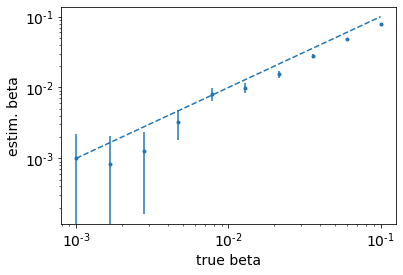

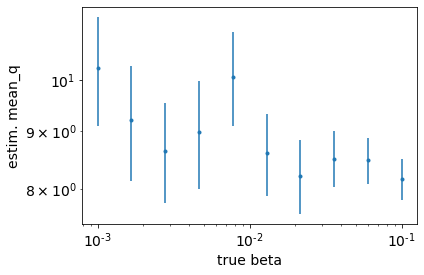

In [5]:

direct = '../data/vary_param2250betasizer/'
sample = 'vary_param2250betasizer_{:d}'
direct+=sample
plot_true_vs_estim(direct,sample, 'beta', np.arange(10), {'mean_lambda': 'bound',
                                                        'gamma_lambda': 'bound',
                                                        'var_lambda': 'bound',
                                                        'mean_q': 'bound',
                                                        'gamma_q': 'bound',
                                                        'var_q':'bound',
                                                        'beta':'bound',
                                                        'var_x':'bound',
                                                        'var_g':'bound',
                                                        'var_dx':'bound',
                                                        'var_dg':'free'} , log=True)

plot_true_vs_estim(direct,sample, 'mean_q', np.arange(10), {'mean_lambda': 'bound',
                                                        'gamma_lambda': 'bound',
                                                        'var_lambda': 'bound',
                                                        'mean_q': 'bound',
                                                        'gamma_q': 'bound',
                                                        'var_q':'bound',
                                                        'beta':'bound',
                                                        'var_x':'bound',
                                                        'var_g':'bound',
                                                        'var_dx':'bound',
                                                        'var_dg':'free'}, parameter2="beta" , log=True)

## Timer cells

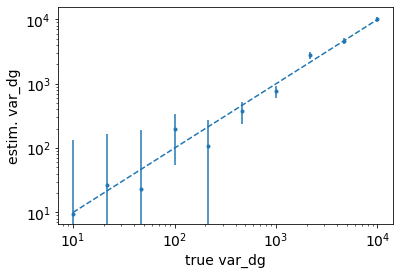

In [6]:

direct = '../data/var_dg_timer_cells/'
sample = 'var_dg_timer_cells_{:d}'
direct+=sample
plot_true_vs_estim(direct,sample, "var_dg", np.arange(2,12), {'mean_lambda': 'bound',
                                                    'gamma_lambda': 'bound',
                                                    'var_lambda': 'bound',
                                                    'mean_q': 'bound',
                                                    'gamma_q': 'bound',
                                                    'var_q':'bound',
                                                    'beta':'bound',
                                                    'var_x':'bound',
                                                    'var_g':'bound',
                                                    'var_dx':'bound',
                                                    'var_dg':'bound'}, log=True)

## "Realistic" cells

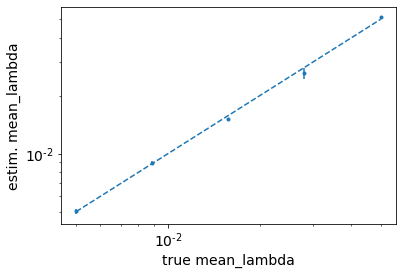

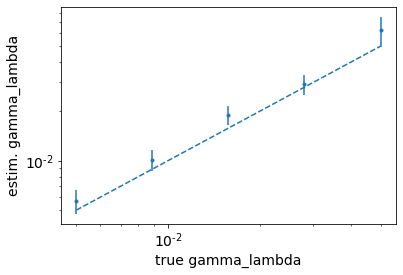

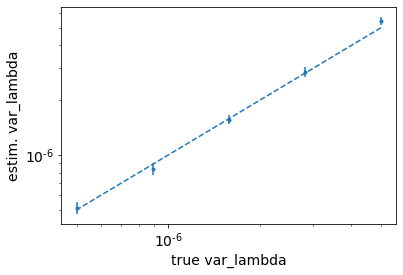

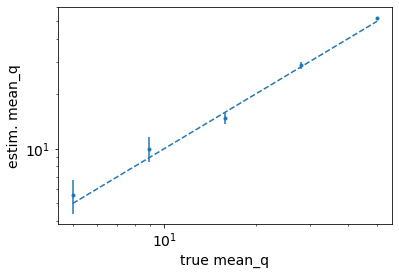

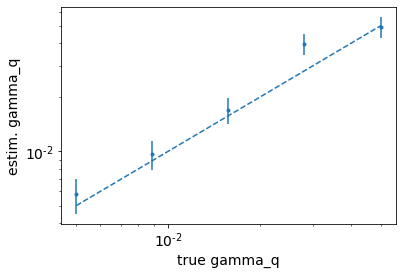

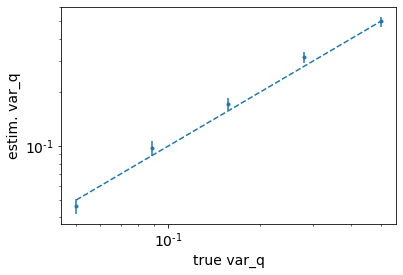

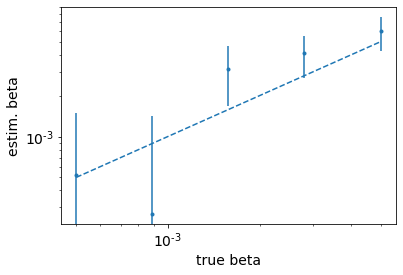

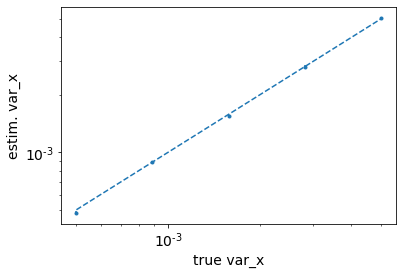

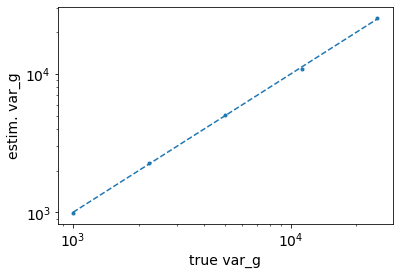

In [7]:
for p in list(params_config.keys())[:-2]:
    direct = '../data/vary_param_n250_' + p + '_sizer/'
    sample = 'vary_param_n250_' + p + '_sizer_{:d}'
    direct+=sample
    # plot_true_vs_estim('../data/vary_param_n250_gamma_lambda_sizer/vary_param_n250_gamma_lambda_sizer_{:d}',       'vary_param_n250_gamma_lambda_sizer_{:d}', "gamma_lambda", np.arange(5), params_config, log=True)
    plot_true_vs_estim(direct,sample, p, np.arange(5), {'mean_lambda': 'bound',
                                                        'gamma_lambda': 'bound',
                                                        'var_lambda': 'bound',
                                                        'mean_q': 'bound',
                                                        'gamma_q': 'bound',
                                                        'var_q':'bound',
                                                        'beta':'bound',
                                                        'var_x':'bound',
                                                        'var_g':'bound',
                                                        'var_dx':'bound',
                                                        'var_dg':'free'}, log=True)
